In [1]:
# Import the dependencies.
import pandas as pd
import numpy as np
import requests
from config import weather_api_key
import random
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-90.000, high=90.000, size=2000)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

      # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

754

In [5]:
import requests
import time
from datetime import datetime

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=96d2d88f2aab278f3d7d5dad58a269a3


In [11]:
# Create an empty list to hold weather data for each city
city_data = []

# Print a message to indicate that the data retrieval starts
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters and set them to 1
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data for each city
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create an endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

  # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cuamba
Processing Record 2 of Set 1 | acarau
Processing Record 3 of Set 1 | bara
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | havre-saint-pierre
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | guanay
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | aksarka
Processing Record 10 of Set 1 | narsaq
Processing Record 11 of Set 1 | bosaso
Processing Record 12 of Set 1 | thinadhoo
Processing Record 13 of Set 1 | brigantine
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | belyy yar
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | ponta do sol
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | abu zabad
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | saint-michel-de

Processing Record 36 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 4 | amderma
City not found. Skipping...
Processing Record 38 of Set 4 | santa rosa
Processing Record 39 of Set 4 | menongue
Processing Record 40 of Set 4 | punta cardon
Processing Record 41 of Set 4 | uthal
Processing Record 42 of Set 4 | seydisehir
Processing Record 43 of Set 4 | piet retief
Processing Record 44 of Set 4 | tromso
Processing Record 45 of Set 4 | belmonte
Processing Record 46 of Set 4 | moroto
Processing Record 47 of Set 4 | kutum
Processing Record 48 of Set 4 | saint-augustin
Processing Record 49 of Set 4 | vasai
Processing Record 50 of Set 4 | lima
Processing Record 1 of Set 5 | manali
Processing Record 2 of Set 5 | phalia
Processing Record 3 of Set 5 | puerto rico
Processing Record 4 of Set 5 | bilma
Processing Record 5 of Set 5 | urk
Processing Record 6 of Set 5 | monopoli
Processing Record 7 of Set 5 | chaman
Processing Record 8 of Set 5 | sawakin
Processing Record 9

Processing Record 26 of Set 8 | kadoma
Processing Record 27 of Set 8 | russkaya polyana
Processing Record 28 of Set 8 | sesheke
Processing Record 29 of Set 8 | sakakah
Processing Record 30 of Set 8 | sereflikochisar
Processing Record 31 of Set 8 | ginda
Processing Record 32 of Set 8 | digapahandi
Processing Record 33 of Set 8 | mahibadhoo
Processing Record 34 of Set 8 | nioki
Processing Record 35 of Set 8 | bafoulabe
Processing Record 36 of Set 8 | ormara
Processing Record 37 of Set 8 | severnyy
Processing Record 38 of Set 8 | rodrigues alves
Processing Record 39 of Set 8 | chapleau
Processing Record 40 of Set 8 | guajara
Processing Record 41 of Set 8 | iisalmi
Processing Record 42 of Set 8 | baghdad
Processing Record 43 of Set 8 | atar
Processing Record 44 of Set 8 | thompson
Processing Record 45 of Set 8 | varzea da palma
Processing Record 46 of Set 8 | aasiaat
Processing Record 47 of Set 8 | kytlym
City not found. Skipping...
Processing Record 48 of Set 8 | kadom
Processing Record 4

Processing Record 9 of Set 12 | turukhansk
Processing Record 10 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 11 of Set 12 | lesnoy
Processing Record 12 of Set 12 | diplo
Processing Record 13 of Set 12 | zverinogolovskoye
Processing Record 14 of Set 12 | srikakulam
Processing Record 15 of Set 12 | bunia
Processing Record 16 of Set 12 | thohoyandou
Processing Record 17 of Set 12 | pizarro
Processing Record 18 of Set 12 | hare bay
Processing Record 19 of Set 12 | firminopolis
Processing Record 20 of Set 12 | kjopsvik
Processing Record 21 of Set 12 | pisco
Processing Record 22 of Set 12 | quebo
Processing Record 23 of Set 12 | berlevag
Processing Record 24 of Set 12 | upata
Processing Record 25 of Set 12 | la uribe
City not found. Skipping...
Processing Record 26 of Set 12 | hunza
City not found. Skipping...
Processing Record 27 of Set 12 | manzil kamil
Processing Record 28 of Set 12 | karasjok
Processing Record 29 of Set 12 | newnan
Processing Record 30 of Set 12 | j

Processing Record 43 of Set 15 | barawe
City not found. Skipping...
Processing Record 44 of Set 15 | ballina
Processing Record 45 of Set 15 | tambacounda
Processing Record 46 of Set 15 | shelbyville
Processing Record 47 of Set 15 | greven
Processing Record 48 of Set 15 | staraya poltavka
Processing Record 49 of Set 15 | amapa
Processing Record 50 of Set 15 | diego de almagro
Processing Record 1 of Set 16 | koubia
Processing Record 2 of Set 16 | puerto colombia
Processing Record 3 of Set 16 | matay
Processing Record 4 of Set 16 | mana
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
len(city_data)


689

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cuamba,-14.8031,36.5372,70.79,89,13,0.94,MZ,2023-02-20 21:43:16
1,Acarau,-2.8856,-40.1200,79.56,80,61,14.12,BR,2023-02-20 21:41:56
2,Bara,10.3744,10.7288,73.69,22,0,8.68,NG,2023-02-20 21:43:17
3,Ushuaia,-54.8000,-68.3000,58.66,51,75,12.66,AR,2023-02-20 21:40:07
4,Havre-Saint-Pierre,50.2334,-63.5986,34.16,93,100,4.61,CA,2023-02-20 21:43:18
5,Saint-Pierre,-21.3393,55.4781,83.88,54,100,8.05,RE,2023-02-20 21:43:18
6,Guanay,-15.4975,-67.8797,78.67,70,75,2.15,BO,2023-02-20 21:43:19
7,Hermanus,-34.4187,19.2345,59.81,66,59,17.16,ZA,2023-02-20 21:43:20
8,Aksarka,66.5606,67.7975,-10.68,98,76,6.38,RU,2023-02-20 21:43:20
9,Narsaq,60.9167,-46.0500,1.62,72,1,9.28,GL,2023-02-20 21:43:21


In [17]:
city_data_df.columns
# column_order = ["City", "Country, "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cuamba,MZ,2023-02-20 21:43:16,-14.8031,36.5372,70.79,89,13,0.94
1,Acarau,BR,2023-02-20 21:41:56,-2.8856,-40.1200,79.56,80,61,14.12
2,Bara,NG,2023-02-20 21:43:17,10.3744,10.7288,73.69,22,0,8.68
3,Ushuaia,AR,2023-02-20 21:40:07,-54.8000,-68.3000,58.66,51,75,12.66
4,Havre-Saint-Pierre,CA,2023-02-20 21:43:18,50.2334,-63.5986,34.16,93,100,4.61
5,Saint-Pierre,RE,2023-02-20 21:43:18,-21.3393,55.4781,83.88,54,100,8.05
6,Guanay,BO,2023-02-20 21:43:19,-15.4975,-67.8797,78.67,70,75,2.15
7,Hermanus,ZA,2023-02-20 21:43:20,-34.4187,19.2345,59.81,66,59,17.16
8,Aksarka,RU,2023-02-20 21:43:20,66.5606,67.7975,-10.68,98,76,6.38
9,Narsaq,GL,2023-02-20 21:43:21,60.9167,-46.0500,1.62,72,1,9.28


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

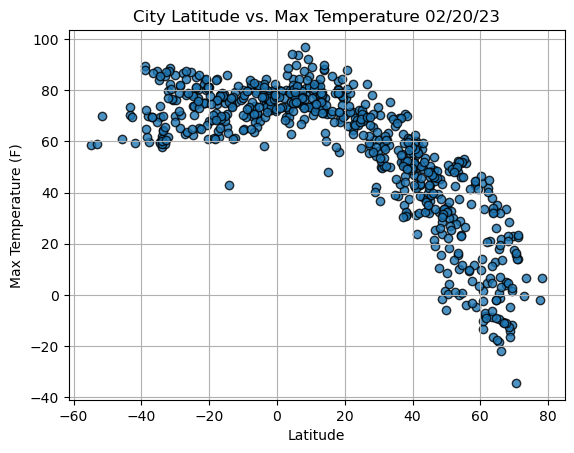

In [31]:
import matplotlib.pyplot as plt


# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

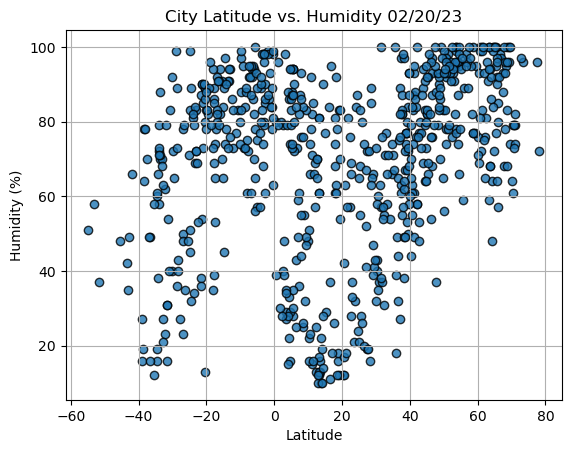

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

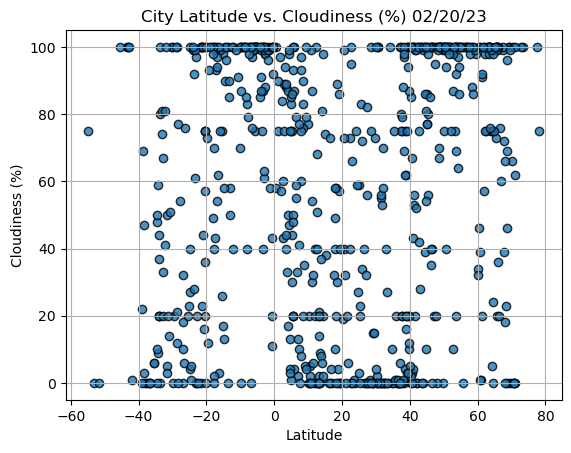

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

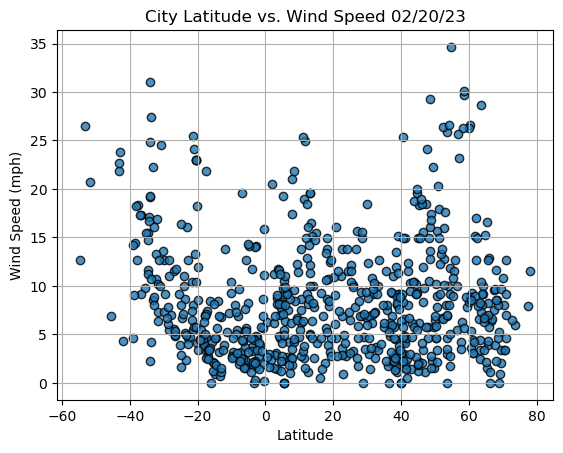

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

SyntaxError: invalid syntax (2317673131.py, line 3)

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bara,NG,2023-02-20 21:43:17,10.3744,10.7288,73.69,22,0,8.68
4,Havre-Saint-Pierre,CA,2023-02-20 21:43:18,50.2334,-63.5986,34.16,93,100,4.61
8,Aksarka,RU,2023-02-20 21:43:20,66.5606,67.7975,-10.68,98,76,6.38
9,Narsaq,GL,2023-02-20 21:43:21,60.9167,-46.0500,1.62,72,1,9.28
10,Bosaso,SO,2023-02-20 21:43:21,11.2842,49.1816,73.00,71,54,2.57
...,...,...,...,...,...,...,...,...,...
683,Amapa,BR,2023-02-20 22:02:23,1.0000,-52.0000,73.09,96,90,1.63
685,Koubia,GN,2023-02-20 22:03:25,11.5833,-11.9000,74.59,16,6,1.50
686,Puerto Colombia,CO,2023-02-20 22:03:26,10.9878,-74.9547,82.49,78,0,25.39
687,Matay,EG,2023-02-20 22:03:26,28.4190,30.7792,55.74,63,0,15.61


In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bara,NG,2023-02-20 21:43:17,10.3744,10.7288,73.69,22,0,8.68
4,Havre-Saint-Pierre,CA,2023-02-20 21:43:18,50.2334,-63.5986,34.16,93,100,4.61
8,Aksarka,RU,2023-02-20 21:43:20,66.5606,67.7975,-10.68,98,76,6.38
9,Narsaq,GL,2023-02-20 21:43:21,60.9167,-46.0500,1.62,72,1,9.28
10,Bosaso,SO,2023-02-20 21:43:21,11.2842,49.1816,73.00,71,54,2.57


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

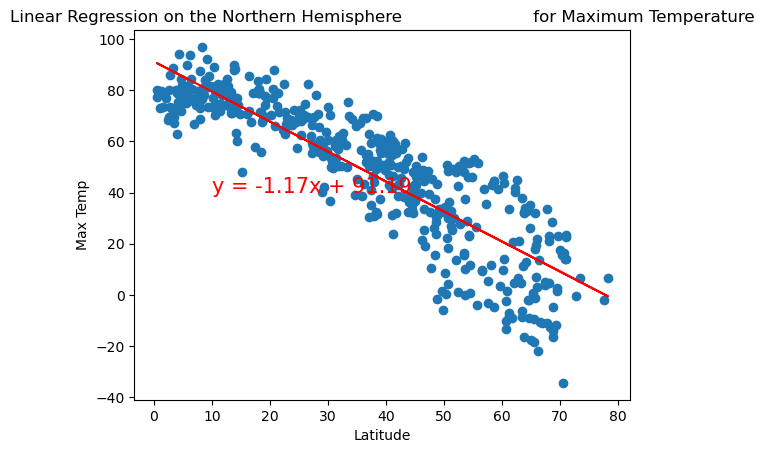

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

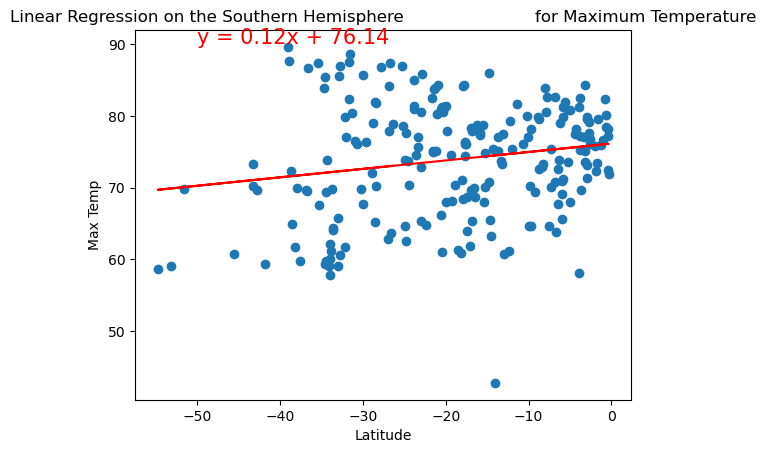

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

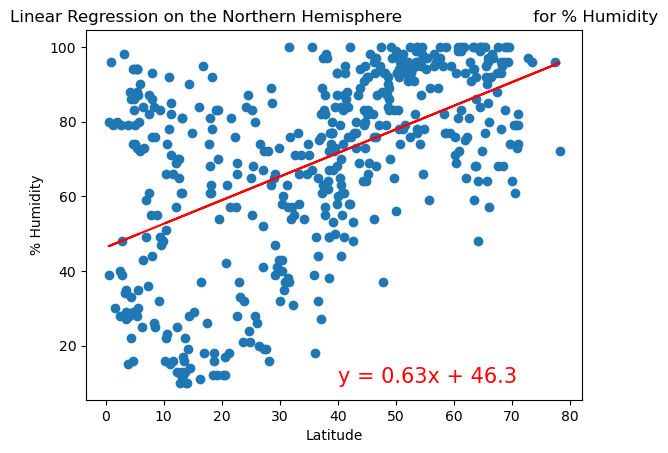

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

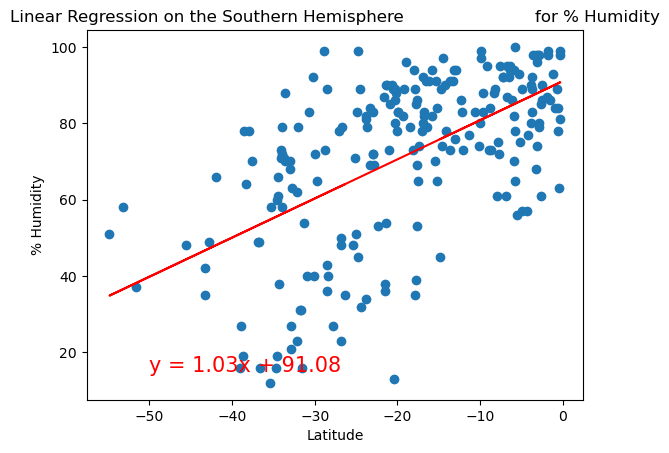

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

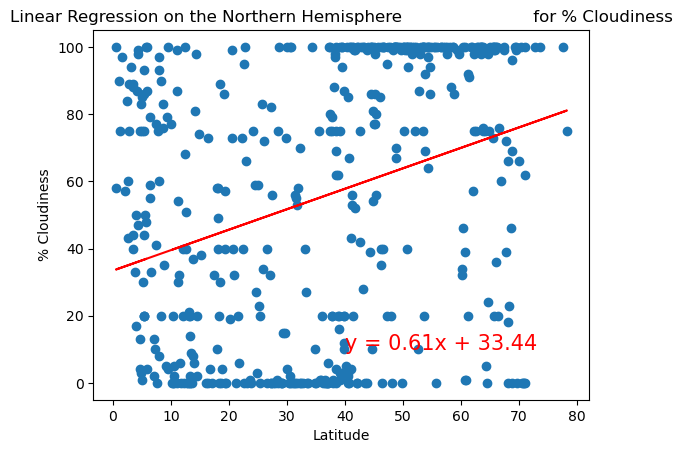

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

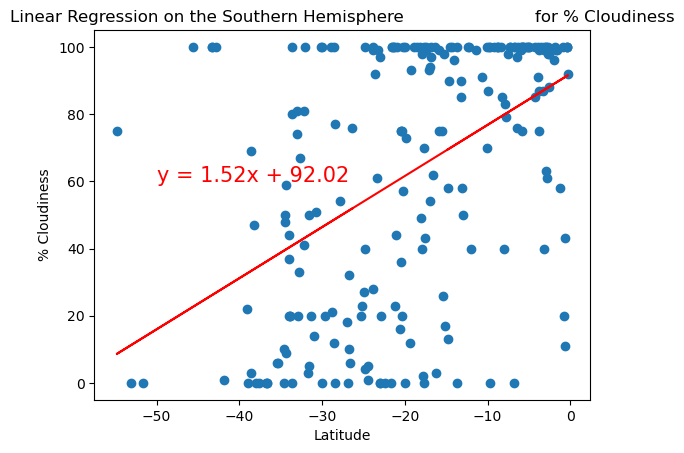

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

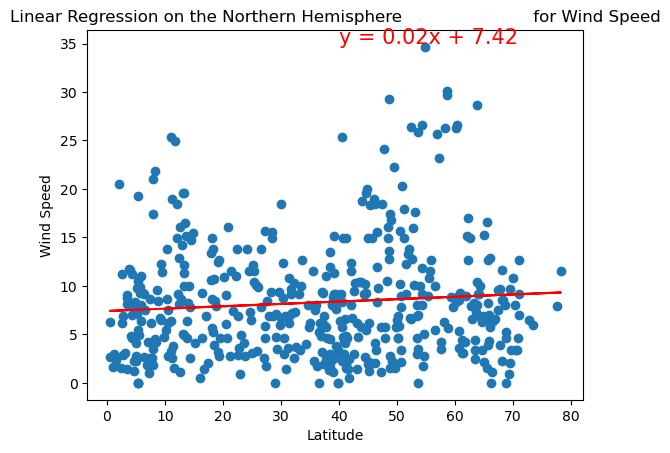

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

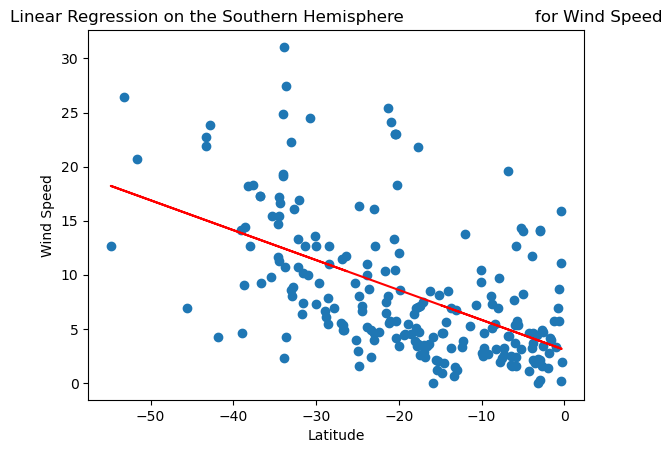

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))